In [1]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

import plotly.graph_objects as go
import us  # Import the us library

from causallearn.search.ConstraintBased.PC import pc


In [2]:
shopper_intent = pd.read_csv("data/online_shoppers_intention.csv")
shopper_intent

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,True,False
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,True,False
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,True,False
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,False,False


In [3]:
shopper_intent.dtypes

Administrative               int64
Administrative_Duration    float64
Informational                int64
Informational_Duration     float64
ProductRelated               int64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                 float64
Month                       object
OperatingSystems             int64
Browser                      int64
Region                       int64
TrafficType                  int64
VisitorType                 object
Weekend                       bool
Revenue                       bool
dtype: object

In [4]:
shopper_intent['SpecialDay'].max()

1.0

In [5]:
shopper_intent['Revenue'] = shopper_intent['Revenue'].astype(int)
shopper_intent['Weekend'] = shopper_intent['Weekend'].astype(int)

In [6]:
data_graph = shopper_intent.drop(['Month'], axis=1)

In [7]:
columns_to_use = [
    'SpecialDay', 'Revenue', 'BounceRates', 'ExitRates',
    'Weekend', 'Administrative', 'Administrative_Duration',
    'Informational', 'Informational_Duration', 'ProductRelated',
    'ProductRelated_Duration', 'OperatingSystems', 'Browser', 'Region',
    'TrafficType','PageValues',
    'VisitorType_Other', 'VisitorType_Returning_Visitor'
]

In [8]:
data_encoded = pd.get_dummies(data_graph, drop_first=True)
data_encoded

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,Weekend,Revenue,VisitorType_Other,VisitorType_Returning_Visitor
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,1,1,1,1,0,0,0,1
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,2,2,1,2,0,0,0,1
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,4,1,9,3,0,0,0,1
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,3,2,2,4,0,0,0,1
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,3,3,1,4,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,4,6,1,1,1,0,0,1
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,3,2,1,8,1,0,0,1
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,3,2,1,13,1,0,0,1
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,2,2,3,11,0,0,0,1


In [9]:
# takes a long time to run
data_frame = data_encoded
# Step 1: Convert DataFrame to NumPy array>
data_array = data_frame.to_numpy()

# Step 2: Apply the PC algorithm to discover the causal graph
alpha = 0.05  # Significance level
pc_graph = pc(data_array, alpha)

# Step 3: Create labels for nodes based on DataFrame columns
node_labels = {i: col for i, col in enumerate(data_encoded.columns)}

# Step 4: Extract edges from the pc_graph and create a NetworkX directed graph
G = nx.DiGraph()
G.add_nodes_from(node_labels.keys())

# Add edges based on the adjacency matrix
for i in range(len(pc_graph.G.graph)):
    for j in range(len(pc_graph.G.graph)):
        if pc_graph.G.graph[i, j] != 0:  # Check for an edge
            if pc_graph.G.graph[j, i] == 1 and pc_graph.G.graph[i, j] == -1:
                # Case: i -> j
                G.add_edge(i, j, edge_type='directed')
            elif pc_graph.G.graph[j, i] == -1 and pc_graph.G.graph[i, j] == -1:
                # Case: i -- j (undirected)
                G.add_edge(i, j, edge_type='undirected')
            elif pc_graph.G.graph[j, i] == 1 and pc_graph.G.graph[i, j] == 1:
                # Case: i <-> j (bidirectional)
                G.add_edge(i, j, edge_type='bidirectional')

  0%|          | 0/18 [00:00<?, ?it/s]

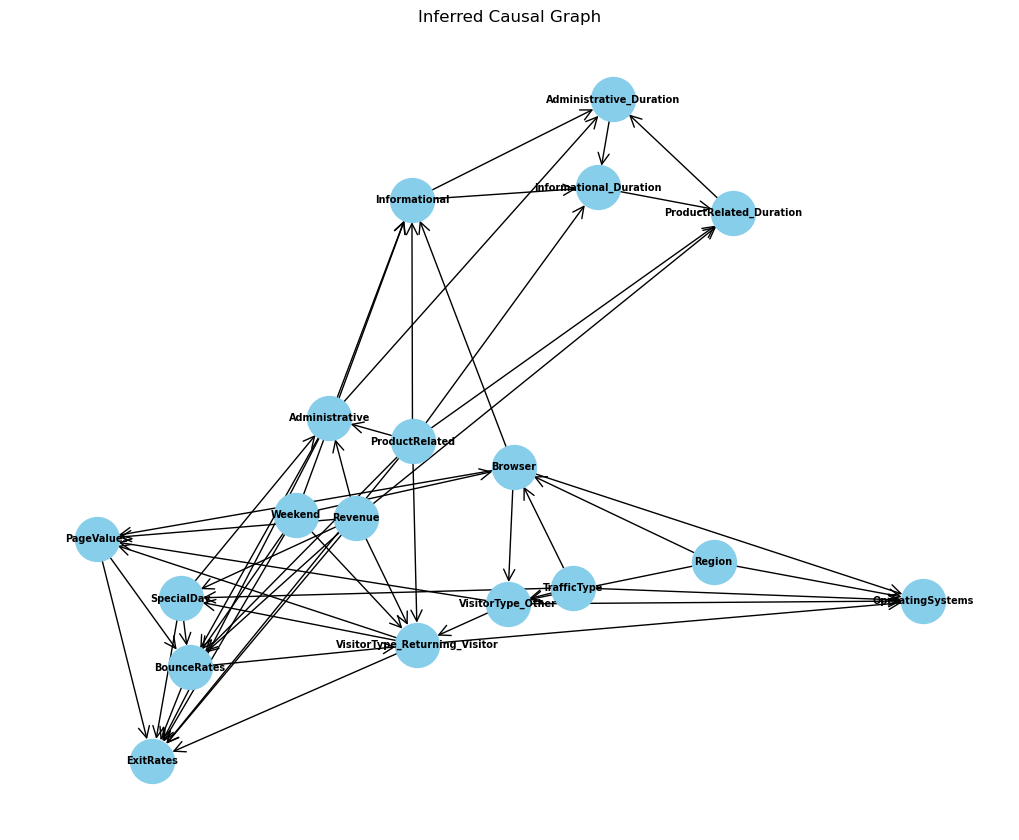

In [16]:
# Step 5: Plot the graph
plt.figure(figsize=(10, 8))
pos = nx.spring_layout(G, k=0.5, iterations=50)  # Increase k for more space between nodes
nx.draw(G, pos, with_labels=True, labels=node_labels, node_size=1000, node_color="skyblue", font_size=7, font_weight="bold", arrowstyle="->", arrowsize=20)
plt.title("Inferred Causal Graph")
plt.show()

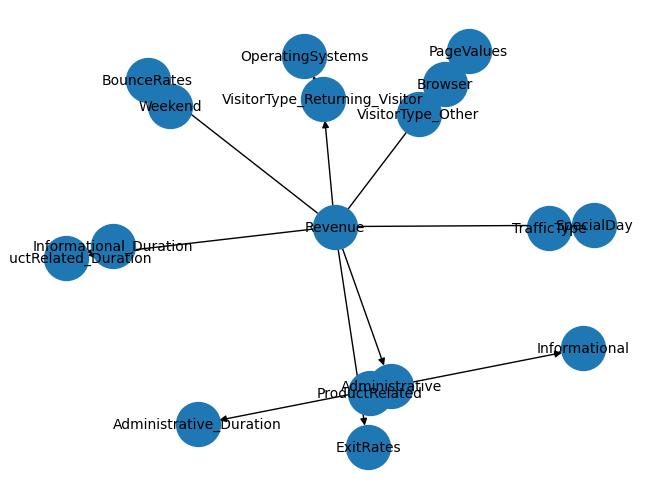

In [33]:
import networkx as nx

# Find the index of the "Revenue" node
revenue_index = list(data_encoded.columns).index("Revenue")

# Get the adjacency matrix from the CausalGraph object
graph_matrix = pc_graph.G.graph  # Assuming this is a NumPy array or similar

# Initialize sets for storing related nodes
revenue_related = {revenue_index}  # Include "Revenue" itself
edges = []  # List to store edges

# First Loop: Find direct relationships (parents, children, spouses)
for j in range(graph_matrix.shape[0]):
    if j == revenue_index:
        continue  # Skip self-loops

    if graph_matrix[j, revenue_index] == 1 and graph_matrix[revenue_index, j] == -1:
        # Directed edge (Revenue → j)
        revenue_related.add(j)
        edges.append((revenue_index, j))  # Directed edge Revenue → j
    elif graph_matrix[revenue_index, j] == 1 and graph_matrix[j, revenue_index] == -1:
        # Directed edge (j → Revenue)
        revenue_related.add(j)
        edges.append((j, revenue_index))  # Directed edge j → Revenue
    elif graph_matrix[j, revenue_index] == -1 and graph_matrix[revenue_index, j] == -1:
        # Undirected relationship (Revenue — j)
        revenue_related.add(j)
        edges.append((revenue_index, j))  # Undirected edge
    elif graph_matrix[j, revenue_index] == 1 and graph_matrix[revenue_index, j] == 1:
        # Bidirectional relationship (Revenue ↔ j)
        revenue_related.add(j)
        edges.append((revenue_index, j))  # Bidirectional edge

# Second Loop: Find secondary relationships (spouses of Revenue's related nodes)
for related_node in list(revenue_related):
    for j in range(graph_matrix.shape[0]):
        if j == related_node or j in revenue_related:
            continue  # Skip self-loops and already identified nodes

        if graph_matrix[j, related_node] == 1 and graph_matrix[related_node, j] == -1:
            # Directed edge (related_node → j)
            revenue_related.add(j)
            edges.append((related_node, j))  # Directed edge related_node → j
        elif graph_matrix[related_node, j] == 1 and graph_matrix[j, related_node] == -1:
            # Directed edge (j → related_node)
            revenue_related.add(j)
            edges.append((j, related_node))  # Directed edge j → related_node
        elif graph_matrix[j, related_node] == -1 and graph_matrix[related_node, j] == -1:
            # Undirected spouse relationship (related_node — j)
            revenue_related.add(j)
            edges.append((related_node, j))  # Undirected edge
        elif graph_matrix[j, related_node] == 1 and graph_matrix[related_node, j] == 1:
            # Bidirectional spouse relationship (related_node ↔ j)
            revenue_related.add(j)
            edges.append((related_node, j))  # Bidirectional edge

# Create a new directed graph containing only the related nodes
subgraph = nx.DiGraph()
subgraph.add_nodes_from(revenue_related)  # Add nodes
subgraph.add_edges_from(edges)           # Add edges

# Map node indices to column names for readability
node_labels = list(data_encoded.columns)
subgraph = nx.relabel_nodes(subgraph, {i: node_labels[i] for i in revenue_related})

# Draw the subgraph
pos = nx.spring_layout(subgraph)
nx.draw(subgraph, pos, with_labels=True, node_size=1000, font_size=10)
plt.show()


In [17]:
labels = columns_to_use

# Find all nodes directly connected to 'Revenue'
revenue_node = labels.index('Revenue')
directly_related_to_revenue = list(G.neighbors(revenue_node))  # Direct neighbors

# Find all variables indirectly related to 'Revenue'
indirectly_related_to_revenue = nx.single_source_shortest_path_length(G, revenue_node)

# Print out the variables most causally related to 'Revenue'
print("Directly Related to 'Revenue':")
for node in directly_related_to_revenue:
    print(labels[node])

print("\nIndirectly Related to 'Revenue':")
for node, distance in indirectly_related_to_revenue.items():
    if distance > 1:  # Only show indirect relationships (more than 1 step away)
        print(f"{labels[node]} (Distance: {distance})")

Directly Related to 'Revenue':
ExitRates

Indirectly Related to 'Revenue':
Administrative (Distance: 2)


In [13]:
#from dowhy import CausalModel
#data_encoded

In [14]:
from causallearn.search.ConstraintBased.FCI import fci
import pandas as pd
import numpy as np

In [ ]:
# Load and preprocess your data

data_wow = data_encoded[columns_to_use].dropna()  # Drop missing values

# Convert data to numpy array
data_np = data_wow.to_numpy()

# Specify the conditional independence test
independence_test = "fisherz"  # Fisher's Z-test for continuous data

# Run FCI
fci_graph = fci(data_np, independence_test, alpha=0.05)
fci_graph, _ = fci_graph

In [ ]:
# Extract the graph structure
causal_matrix = fci_graph.graph  # Adjacency matrix
labels = columns_to_use

# Create a NetworkX graph
G = nx.DiGraph()

# Add nodes and edges
for i in range(len(labels)):
    G.add_node(i, label=labels[i])  # Add nodes with labels
    for j in range(len(labels)):
        if causal_matrix[i, j] != 0:  # Edge exists
            if causal_matrix[i, j] == 1:
                G.add_edge(i, j)  # Directed edge
            elif causal_matrix[i, j] == -1:
                G.add_edge(i, j, style="bidirectional")  # Bidirected edge

# Create a dictionary for node labels
node_labels = {i: labels[i] for i in range(len(labels))}

# Use a spring layout for visualization
pos = nx.spring_layout(G, seed=42)  # Consistent layout with a random seed

# Draw nodes
nx.draw_networkx_nodes(G, pos, node_size=1000, node_color="skyblue", alpha=0.9)

# Draw edges
edges = G.edges(data=True)
nx.draw_networkx_edges(
    G,
    pos,
    edgelist=[(u, v) for u, v, d in edges if d.get("style") != "bidirectional"],
    edge_color="black",
    arrows=True,
    arrowsize=20,
)
nx.draw_networkx_edges(
    G,
    pos,
    edgelist=[(u, v) for u, v, d in edges if d.get("style") == "bidirectional"],
    edge_color="red",
    style="dashed",
)

# Add labels
nx.draw_networkx_labels(G, pos, labels=node_labels, font_size=10, font_color="black")

# Display the graph
plt.title("Causal Graph (PAG)")
plt.show()

In [ ]:
data_encoded.columns

In [ ]:
confounders = [
    'BounceRates', 'ExitRates', 'PageValues', 'Weekend', 
    'Administrative', 'Administrative_Duration', 'Informational', 
    'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration', 
    'OperatingSystems', 'Browser', 'Region', 'TrafficType', 
    'Month_Dec', 'Month_Feb', 'Month_Jul', 'Month_June', 
    'Month_Mar', 'Month_May', 'Month_Nov', 'Month_Oct', 'Month_Sep', 
    'VisitorType_Other', 'VisitorType_Returning_Visitor'
]

In [ ]:
model = CausalModel(
    data=data_encoded,
    treatment='SpecialDay',
    outcome='Revenue',
    common_causes=confounders  # Add other potential confounders here if available
)

# Identify causal effect
identified_estimand = model.identify_effect()
print(identified_estimand)

# Estimate the causal effect
estimate = model.estimate_effect(identified_estimand, method_name="backdoor.linear_regression")
print(estimate)